In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, scale, LabelEncoder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, LSTM
from tensorflow.keras.layers import Conv1D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('./data/pamap2.csv', index_col=0)

df

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
2932,37.70,1,100.0,30.3750,2.301060,7.25857,6.09259,2.207200,7.24042,5.95555,...,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.000000,0.000000,0.000000,0.000000,1
2943,37.81,1,100.0,30.3750,2.246150,7.48180,5.55219,2.251300,7.40595,5.65313,...,-0.017912,0.015243,-60.7820,-36.2116,-58.4891,1.000000,0.000000,0.000000,0.000000,1
2954,37.92,1,100.0,30.3750,2.300000,7.10681,6.09309,2.346130,7.46611,6.12103,...,-0.011798,0.011387,-61.4531,-36.2983,-58.4845,1.000000,0.000000,0.000000,0.000000,1
2965,38.03,1,100.0,30.3750,2.494550,7.52335,6.17157,2.591060,7.76653,6.27112,...,-0.009233,0.005823,-62.0065,-36.7217,-58.3608,1.000000,0.000000,0.000000,0.000000,1
2976,38.14,1,101.0,30.3750,2.716540,8.30596,4.78671,2.595960,7.94641,4.86635,...,-0.042562,-0.009289,-60.4311,-37.5412,-59.0013,1.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818402,3629.66,5,195.0,30.8125,0.565086,2.59595,9.27677,0.660681,2.70904,9.44024,...,-0.002287,-0.017737,-17.6912,12.0079,26.5782,0.164776,0.798149,0.227263,0.533065,8
2818413,3629.77,5,195.0,30.8125,0.570697,2.82459,9.39155,0.495537,2.75557,9.47051,...,-0.007246,0.007512,-17.6928,12.0076,26.4364,0.166393,0.797223,0.228965,0.533221,8
2818423,3629.87,5,195.0,30.8125,0.756704,2.78452,9.31749,0.781122,2.72325,9.40988,...,0.003818,0.017649,-17.9459,11.7619,26.1521,0.166735,0.797039,0.229771,0.533041,8
2818435,3629.99,5,195.0,30.8125,0.530504,2.67279,9.35297,0.540382,2.87591,9.30409,...,-0.003649,-0.002610,-18.2103,12.4200,26.5759,0.168936,0.795763,0.231222,0.533628,8


In [3]:
from sklearn.preprocessing import StandardScaler

X = df[['handAcc16_1' , 'handAcc16_2' , 'handAcc16_3' ,
    'handAcc6_1' , 'handAcc6_2' , 'handAcc6_3' ,
    'handGyro1' , 'handGyro2',   'handGyro3' ,      
    'handMagne1',  'handMagne2' , 'handMagne3',  
    'chestAcc16_1', 'chestAcc16_2',  'chestAcc16_3',   
    'chestAcc6_1',  'chestAcc6_2',  'chestAcc6_3',
    'chestGyro1',   'chestGyro2',   'chestGyro3',    
    'chestMagne1', 'chestMagne2' , 'chestMagne3']]
y= df['activityID']

scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['handAcc16_1' , 'handAcc16_2' , 'handAcc16_3' ,
    'handAcc6_1' , 'handAcc6_2' , 'handAcc6_3' ,
    'handGyro1' , 'handGyro2',   'handGyro3' ,      
    'handMagne1',  'handMagne2' , 'handMagne3',  
    'chestAcc16_1', 'chestAcc16_2',  'chestAcc16_3',   
    'chestAcc6_1',  'chestAcc6_2',  'chestAcc6_3',
    'chestGyro1',   'chestGyro2',   'chestGyro3',    
    'chestMagne1', 'chestMagne2' , 'chestMagne3'])
scaled_X['label'] = y.values

In [4]:
scaled_X.head(10)

,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,...,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,label
0,1.045326,0.482125,0.795339,1.020984,0.515007,0.709843,-0.050077,-0.063520,0.010673,-0.512436,...,-0.142715,0.267651,-0.464490,-0.025283,-0.039285,-0.058621,-0.320001,-1.109523,2.088468,1
1,1.037394,0.511525,0.645671,1.027347,0.538227,0.625688,-0.332105,-0.040984,-0.027302,-0.512858,...,-0.161033,0.270759,-0.457645,-0.099793,-0.078221,-0.040138,-0.283493,-1.081785,2.171801,1
2,1.045173,0.462137,0.795477,1.041029,0.546666,0.755891,0.063629,-0.076888,0.011046,-0.490177,...,-0.197943,0.280109,-0.464328,-0.049967,-0.108366,-0.076733,-0.288014,-1.116606,2.100712,1
3,1.073278,0.516997,0.817213,1.076369,0.588809,0.797656,-0.197698,-0.331183,-0.013566,-0.494530,...,-0.178895,0.286269,-0.437176,-0.196031,0.015376,0.032507,-0.308281,-1.086287,2.106397,1
4,1.105348,0.620071,0.433665,1.077076,0.614042,0.406751,0.298940,-0.069269,-0.003524,-0.535720,...,-0.114839,0.248966,-0.434038,-0.006253,-0.014541,-0.123602,-0.223819,-1.136728,2.125185,1
5,1.081223,0.531204,0.646790,1.058209,0.567687,0.663319,-0.376165,-0.065268,-0.042220,-0.518867,...,-0.160989,0.261430,-0.444087,0.019838,-0.019583,0.086809,-0.287337,-1.140714,2.130267,1
6,1.120882,0.335449,0.510746,1.155039,0.357123,0.344683,-0.605600,0.169430,-0.111813,-0.453055,...,-0.115281,0.249001,-0.461212,-0.223323,-0.040860,0.055358,-0.287517,-1.134701,2.124360,1
7,1.108197,0.572129,0.913760,1.084189,0.701071,0.872792,-0.364258,0.256298,0.028632,-0.383153,...,-0.105414,0.261380,-0.437416,0.078540,0.020927,-0.186836,-0.262824,-1.124073,2.172018,1
8,1.058022,0.512381,0.880763,1.067211,0.527444,0.814750,0.284235,1.078637,0.202735,-0.389909,...,-0.068725,0.252049,-0.444321,-0.066442,-0.052849,-0.042083,-0.268748,-1.135776,2.171927,1
9,0.974848,0.429155,1.145449,0.919740,0.435393,1.092779,0.285924,1.336779,0.080749,-0.272784,...,-0.133212,0.252080,-0.430592,-0.071147,-0.035318,-0.409870,-0.198638,-1.137947,2.166927,1


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, 
                                                    scaled_X["label"],
                                                    test_size = 0.2, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [6]:
X_train

,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,...,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,label
47864,-0.479485,-0.174799,0.042034,-0.464264,-0.165517,0.060204,-0.056599,0.248808,0.051130,0.572234,...,-1.360984,0.274634,-0.349682,-0.115885,0.087219,0.977505,-0.447452,-0.168704,0.093025,3
45703,0.261713,0.313654,0.987217,0.259627,0.361579,0.959935,-0.089675,-0.055851,-0.012589,-0.464331,...,-0.110620,-0.120598,-0.312935,0.813387,0.036522,-0.182503,-0.218321,0.324236,0.153105,2
66679,-0.858558,0.377272,-0.036724,-0.774954,0.406513,-0.017305,-0.195096,-0.011921,-0.437046,0.917754,...,-1.877564,0.976093,0.037528,0.890447,-0.443214,0.547464,-0.646052,-0.407979,-0.641881,4
93645,-0.573366,0.028828,-0.409800,-0.586197,0.034275,-0.377440,0.104479,-0.050521,-0.017719,0.419424,...,0.281062,0.263616,0.016915,0.127598,0.074803,-0.001394,-0.529221,-0.055618,-0.255106,3
84311,-0.762851,0.010583,-0.319177,-0.785703,0.014570,-0.208878,0.703273,0.835219,-0.669350,1.164987,...,-0.216343,-0.021440,-0.108576,0.245193,0.532761,0.609806,0.967096,-0.877427,0.336519,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81968,0.255900,0.766390,1.676697,0.305897,0.778988,1.773236,-1.210262,0.485158,1.091411,1.517563,...,0.005065,0.549010,0.334336,0.202508,1.330027,0.416138,-1.692382,-0.613033,0.632263,13
8964,-1.368906,0.203247,0.482823,-1.292282,0.204861,0.438418,0.609778,-0.233970,-0.071505,1.675948,...,0.868833,0.847937,-0.899677,-1.087877,0.277972,-0.324634,0.195007,-2.204789,-0.012171,13
71480,-2.611455,2.640520,0.419192,-2.676609,2.506652,0.052955,1.188106,-0.485738,-2.707661,-0.654825,...,-1.129080,2.108845,-0.164339,4.335919,-1.687328,-1.468581,-0.641531,-0.525093,-0.403074,5
70863,0.354227,0.511006,-0.621089,0.454356,0.514139,-0.583279,0.157134,-0.173622,-1.108253,0.920668,...,-0.272756,-0.263813,0.114973,-0.875911,0.298594,-0.123644,0.425319,-0.440682,1.113609,7


In [7]:
y_train

47864     3
45703     2
66679     4
93645     3
84311     4
         ..
81968    13
8964     13
71480     5
70863     7
80841    13
Name: label, Length: 94812, dtype: int64

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((94812, 25), (23704, 25), (94812,), (23704,))

In [9]:
TIME_STEPS = 40
STEP = 10

In [10]:
from scipy import stats

def create_dataset(X, y, time_steps, step):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)


X_train_chest, y_train_chest = create_dataset(X_train[['chestAcc16_1', 'chestAcc16_2',  'chestAcc16_3',   
    'chestAcc6_1',  'chestAcc6_2',  'chestAcc6_3',
    'chestGyro1',   'chestGyro2',   'chestGyro3',    
    'chestMagne1', 'chestMagne2' , 'chestMagne3']], X_train.label, TIME_STEPS,
                                  STEP)

X_test_chest, y_test_chest = create_dataset(X_test[['chestAcc16_1', 'chestAcc16_2',  'chestAcc16_3',   
    'chestAcc6_1',  'chestAcc6_2',  'chestAcc6_3',
    'chestGyro1',   'chestGyro2',   'chestGyro3',    
    'chestMagne1', 'chestMagne2' , 'chestMagne3']], X_test.label, TIME_STEPS, STEP)

X_train_hands, y_train_hands = create_dataset(X_train[['handAcc16_1' , 'handAcc16_2' , 'handAcc16_3' ,
    'handAcc6_1' , 'handAcc6_2' , 'handAcc6_3' ,
    'handGyro1' , 'handGyro2',   'handGyro3' ,      
    'handMagne1',  'handMagne2' , 'handMagne3']], X_train.label, TIME_STEPS,
                                  STEP)

X_test_hands, y_test_hands = create_dataset(X_test[['handAcc16_1' , 'handAcc16_2' , 'handAcc16_3' ,
    'handAcc6_1' , 'handAcc6_2' , 'handAcc6_3' ,
    'handGyro1' , 'handGyro2',   'handGyro3' ,      
    'handMagne1',  'handMagne2' , 'handMagne3']], X_test.label, TIME_STEPS, STEP)

print(X_train.shape, y_train.shape)

C:\Users\adminastor\AppData\Local\Temp\ipykernel_12352\1326165448.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.append(stats.mode(labels)[0][0])
C:\Users\adminastor\AppData\Local\Temp\ipykernel_12352\1326165448.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this war

(94812, 25) (94812,)


In [11]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc = enc.fit(y_train_chest)

y_train_chest = enc.transform(y_train_chest)
y_test_chest = enc.transform(y_test_chest)
y_train_hands = enc.transform(y_train_hands)
y_test_hands = enc.transform(y_test_hands)

In [12]:
y_train_chest

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [13]:
print("X_train_chest.shape: ", X_train_chest.shape)
print("X_test_chest.shape ", X_test_chest.shape)
print("y_train_chest.shape ", y_train_chest.shape)
print("y_test_chest.shape ", y_test_chest.shape)

X_train_chest.shape:  (9478, 40, 12)
X_test_chest.shape  (2367, 40, 12)
y_train_chest.shape  (9478, 8)
y_test_chest.shape  (2367, 8)


In [14]:
verbose,epochs,batch_size=1,10,32 

n_timesteps,n_features,n_outputs=X_train_chest.shape[1],X_train_chest.shape[2],y_train_chest.shape[1]

In [15]:
n_timesteps, n_features, n_outputs

(40, 12, 8)

In [16]:
model = Sequential()
model.add(LSTM(64, input_shape=[n_timesteps, n_features], return_sequences = True))
model.add(LSTM(128))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(n_outputs, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 64)            19712     
                                                                 
 lstm_1 (LSTM)               (None, 128)               98816     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 520       
                                                                 
Total params: 127,304
Trainable params: 127,304
Non-trai

In [17]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [18]:
history = model.fit(X_train_chest, y_train_chest, epochs = 10, batch_size = 32, validation_split = 0.1, shuffle = True)

Epoch 1/10
267/267 [==============================] - 14s 41ms/step - loss: 1.6246 - accuracy: 0.3816 - val_loss: 1.4774 - val_accuracy: 0.4504
Epoch 2/10
267/267 [==============================] - 11s 41ms/step - loss: 1.5097 - accuracy: 0.4191 - val_loss: 1.4804 - val_accuracy: 0.4441
Epoch 3/10
267/267 [==============================] - 10s 38ms/step - loss: 1.4680 - accuracy: 0.4272 - val_loss: 1.4474 - val_accuracy: 0.4525
Epoch 4/10
267/267 [==============================] - 11s 43ms/step - loss: 1.4397 - accuracy: 0.4377 - val_loss: 1.3972 - val_accuracy: 0.4568
Epoch 5/10
267/267 [==============================] - 11s 41ms/step - loss: 1.4230 - accuracy: 0.4438 - val_loss: 1.4945 - val_accuracy: 0.4019
Epoch 6/10
267/267 [==============================] - 10s 38ms/step - loss: 1.4084 - accuracy: 0.4491 - val_loss: 1.4077 - val_accuracy: 0.4546
Epoch 7/10
267/267 [==============================] - 11s 42ms/step - loss: 1.3801 - accuracy: 0.4576 - val_loss: 1.4059 - val_accuracy:

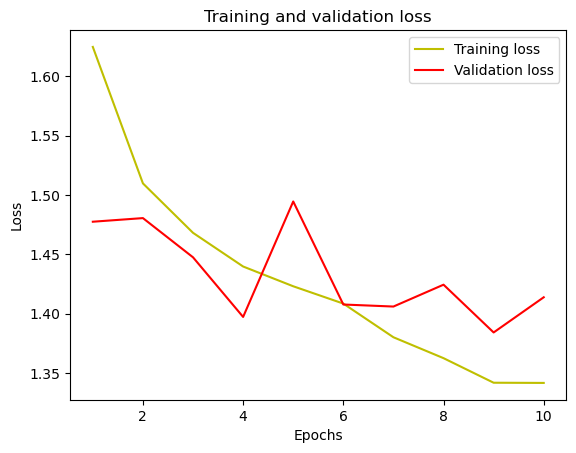

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

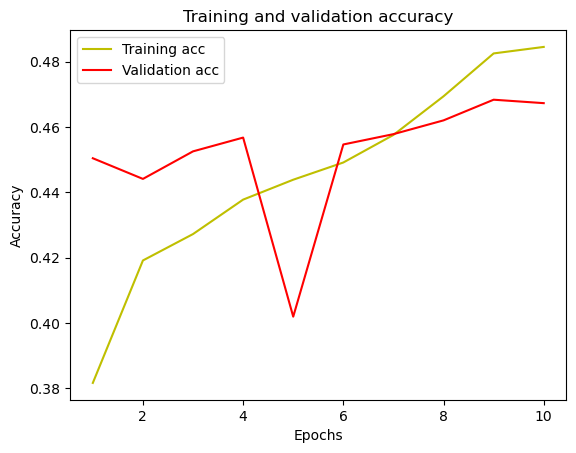

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
model.evaluate(X_test_chest, y_test_chest)
y_pred = model.predict(X_test_chest)

74/74 [==============================] - 2s 14ms/step


In [22]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_chest,axis=1)
Y_pred = np.argmax(model.predict(X_test_chest),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

74/74 [==============================] - 1s 16ms/step
Confusion Matrix
[[373  19   1  54   0   0   0   0]
 [ 63 130  45 201   0   0   0   0]
 [ 45  90  67 195   0   0   0   0]
 [130  64  42 515   0   0   0   0]
 [  2   0   0   3   0   0   0   0]
 [ 35  21  16 218   0   0   0   0]
 [  7   0   0  10   0   0   0   0]
 [  5   1   1  14   0   0   0   0]]


In [23]:
print(X_train.shape,y_test.shape)
base_loss,base_accuracy=model.evaluate(X_test_chest, y_test_chest, batch_size=batch_size, verbose=1)

cnn_file='./data/CNN_Model.h5'
  
tf.keras.models.save_model(model, cnn_file, include_optimizer=False)
print('model saved at ', cnn_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

(94812, 25) (23704,)
74/74 [==============================] - 1s 15ms/step - loss: 1.3643 - accuracy: 0.4584
model saved at  ./data/CNN_Model.h5
Accuracy >45.838615
Base Loss >1.36


## Tuning

In [24]:
# Base 모델을 로드

base_model = keras.models.load_model(cnn_file)

In [30]:
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 5

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

new_model = keras.models.Sequential(base_model.layers[:-1])
new_model.add(keras.layers.Dense(8, activation='sigmoid'))

new_model.compile(loss="categorical_crossentropy",
                     optimizer=keras.optimizers.Adam(lr=1e-3),
                     metrics=["accuracy"])

Number of layers in the base model:  6


C:\Users\adminastor\anaconda3\envs\homl3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [26]:
display_layers = [(layer, layer.name, layer.trainable) for layer in base_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.layers.rnn.lstm.LSTM object at 0x000002...,lstm,False
1,<keras.layers.rnn.lstm.LSTM object at 0x000002...,lstm_1,False
2,<keras.layers.regularization.dropout.Dropout o...,dropout,False
3,<keras.layers.core.dense.Dense object at 0x000...,dense,False
4,<keras.layers.regularization.dropout.Dropout o...,dropout_1,False
5,<keras.layers.core.dense.Dense object at 0x000...,dense_1,True


In [27]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 64)            19712     
                                                                 
 lstm_1 (LSTM)               (None, 128)               98816     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
Total params: 127,304
Trainable params: 520
Non-traina

In [28]:
history3 = new_model.fit(X_train_hands, y_train_hands, epochs=10, batch_size = 32, validation_split = 0.1, shuffle = True)


Epoch 1/10
267/267 [==============================] - 7s 18ms/step - loss: 1.9196 - accuracy: 0.2252 - val_loss: 1.6816 - val_accuracy: 0.3386
Epoch 2/10
267/267 [==============================] - 4s 15ms/step - loss: 1.7314 - accuracy: 0.2872 - val_loss: 1.6507 - val_accuracy: 0.3629
Epoch 3/10
267/267 [==============================] - 4s 15ms/step - loss: 1.6890 - accuracy: 0.3084 - val_loss: 1.6372 - val_accuracy: 0.3692
Epoch 4/10
267/267 [==============================] - 4s 16ms/step - loss: 1.6653 - accuracy: 0.3325 - val_loss: 1.6285 - val_accuracy: 0.3671
Epoch 5/10
267/267 [==============================] - 4s 16ms/step - loss: 1.6592 - accuracy: 0.3288 - val_loss: 1.6266 - val_accuracy: 0.3766
Epoch 6/10
267/267 [==============================] - 4s 16ms/step - loss: 1.6486 - accuracy: 0.3362 - val_loss: 1.6247 - val_accuracy: 0.3660
Epoch 7/10
267/267 [==============================] - 4s 16ms/step - loss: 1.6456 - accuracy: 0.3365 - val_loss: 1.6234 - val_accuracy: 0.3692

## 미세조정

In [31]:
base_model.trainable = True
new_model.compile(loss="categorical_crossentropy",
                     optimizer=keras.optimizers.Adam(lr=1e-3),
                     metrics=["accuracy"])

In [32]:
display_layers = [(layer, layer.name, layer.trainable) for layer in base_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.layers.rnn.lstm.LSTM object at 0x000002...,lstm,True
1,<keras.layers.rnn.lstm.LSTM object at 0x000002...,lstm_1,True
2,<keras.layers.regularization.dropout.Dropout o...,dropout,True
3,<keras.layers.core.dense.Dense object at 0x000...,dense,True
4,<keras.layers.regularization.dropout.Dropout o...,dropout_1,True
5,<keras.layers.core.dense.Dense object at 0x000...,dense_1,True


In [33]:
history3 = new_model.fit(X_train_hands, y_train_hands, epochs=10, batch_size = 32, validation_split = 0.1, shuffle = True)
new_model.summary()

Epoch 1/10
267/267 [==============================] - 14s 40ms/step - loss: 1.6607 - accuracy: 0.3617 - val_loss: 1.5094 - val_accuracy: 0.4304
Epoch 2/10
267/267 [==============================] - 10s 37ms/step - loss: 1.5199 - accuracy: 0.4181 - val_loss: 1.4745 - val_accuracy: 0.4399
Epoch 3/10
267/267 [==============================] - 11s 40ms/step - loss: 1.4633 - accuracy: 0.4472 - val_loss: 1.4670 - val_accuracy: 0.4546
Epoch 4/10
267/267 [==============================] - 11s 40ms/step - loss: 1.4353 - accuracy: 0.4581 - val_loss: 1.4473 - val_accuracy: 0.4546
Epoch 5/10
267/267 [==============================] - 11s 41ms/step - loss: 1.3874 - accuracy: 0.4776 - val_loss: 1.4811 - val_accuracy: 0.4441
Epoch 6/10
267/267 [==============================] - 11s 40ms/step - loss: 1.3649 - accuracy: 0.4882 - val_loss: 1.4837 - val_accuracy: 0.4420
Epoch 7/10
267/267 [==============================] - 11s 40ms/step - loss: 1.3309 - accuracy: 0.5041 - val_loss: 1.4276 - val_accuracy:

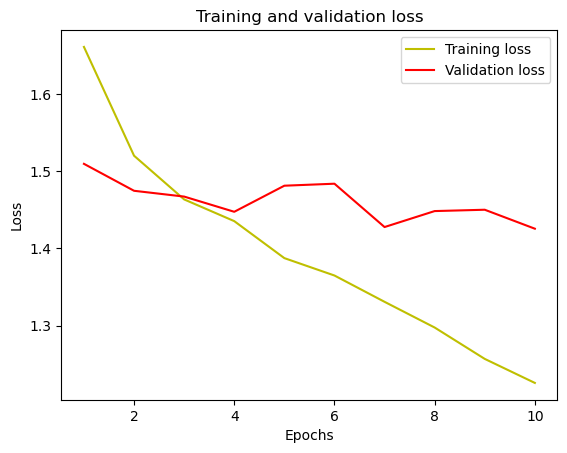

In [35]:
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

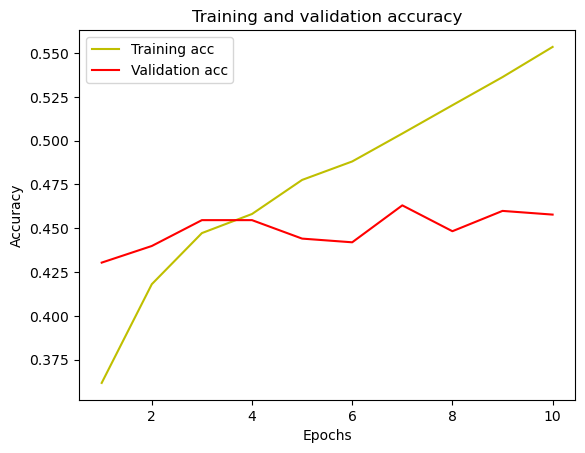

In [36]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [38]:
new_model.evaluate(X_test_hands, y_test_hands)
y_pred = new_model.predict(X_test_hands)

74/74 [==============================] - 1s 19ms/step
